# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

### 
Objective:

**Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.**

Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

Part 1: Data Preparation and Exploration
Part 2: Model Building - ARIMA
Part 3: Model Building - Exponential Smoothing
Part 4: Evaluation and Comparison

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 1: Data Loading
data = pd.read_csv("exchange_rate.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

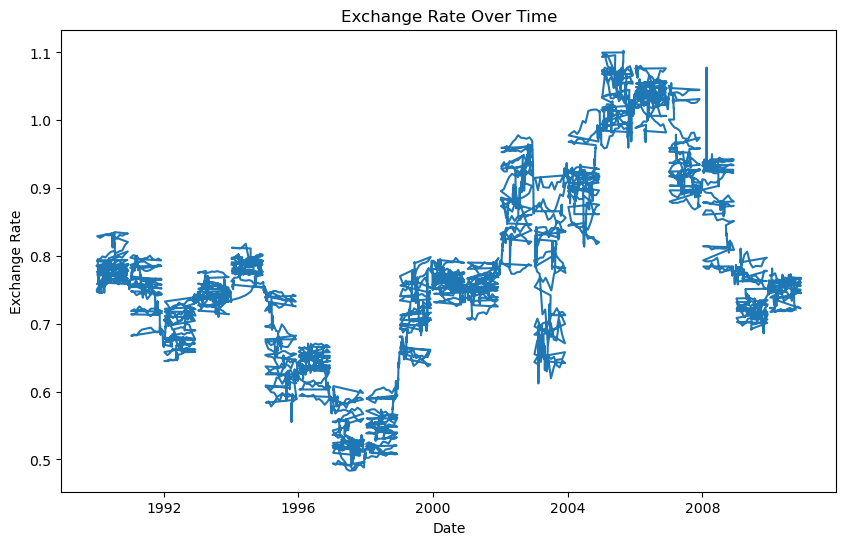

In [3]:
# Step 2: Initial Exploration
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [4]:
# Step 3: Data Preprocessing

# Check for missing values
print(data.isnull().sum())

Ex_rate    0
dtype: int64


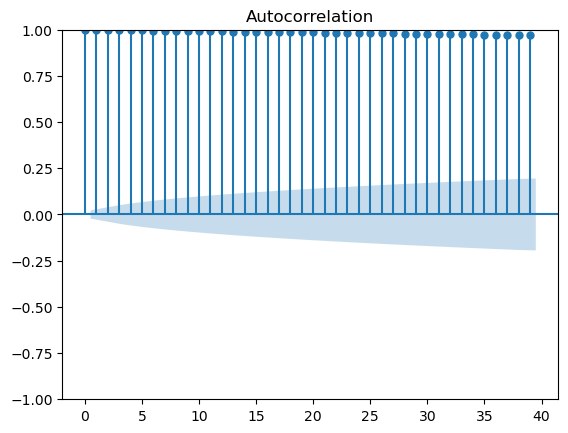

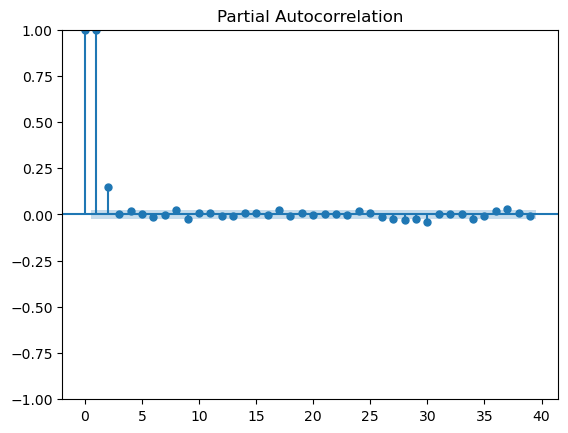

In [5]:
# Step 4: Model Building - ARIMA

# Using ARIMA for forecasting
# Parameter Selection for ARIMA
plot_acf(data['Ex_rate'])
plot_pacf(data['Ex_rate'])
plt.show()

In [6]:
# From the ACF and PACF plots, identify the parameters (p, d, q)

# Model Fitting
order = (5, 1, 0)  # Example parameters (p, d, q)
arima_model = ARIMA(data['Ex_rate'], order=order)
arima_result = arima_model.fit()

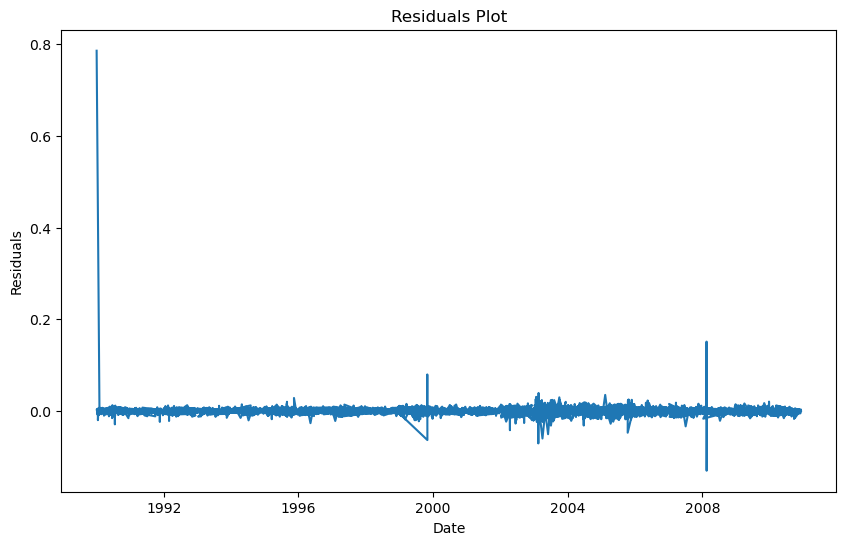

In [7]:
# Diagnostics
residuals = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

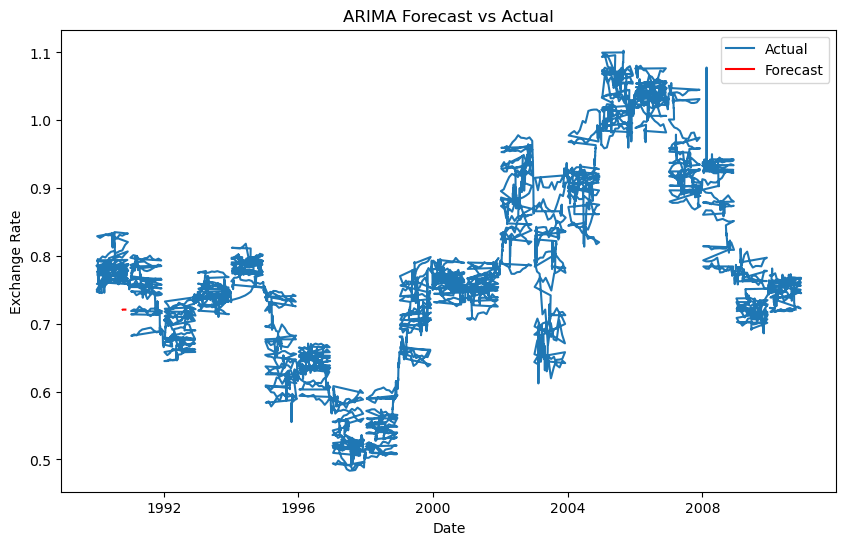

In [8]:
# Forecasting
forecast = arima_result.forecast(steps=30)  # Example forecast for the next 30 days
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [9]:
# Part 5: Model Building - Exponential Smoothing

# using Simple Exponential Smoothing
model = ExponentialSmoothing(data['Ex_rate'], trend=None, seasonal=None)
fit_model = model.fit()

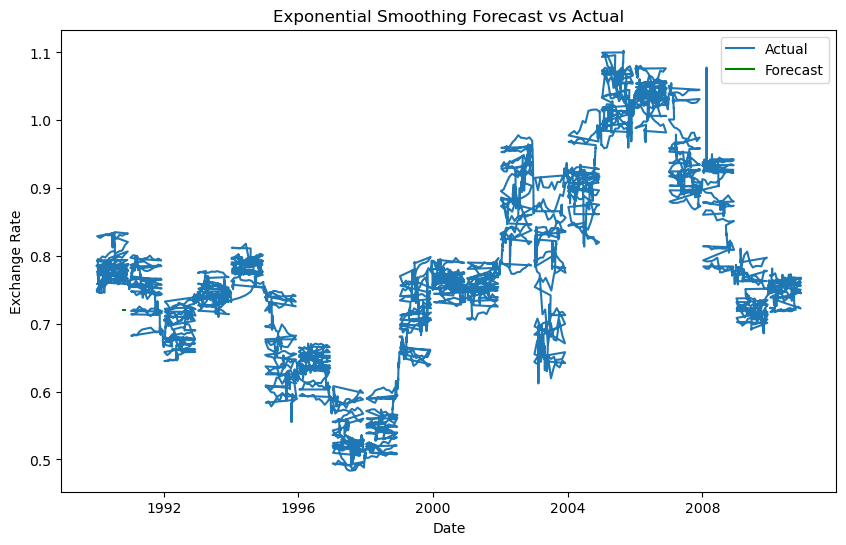

In [10]:
# Forecasting
exp_forecast = fit_model.forecast(steps=30)  # Example forecast for the next 30 days
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual')
plt.plot(exp_forecast.index, exp_forecast, label='Forecast', color='green')
plt.title('Exponential Smoothing Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [11]:
# Part 6: Evaluation and Comparison

# Compute Error Metrics
# Using MAE and RMSE
mae_arima = mean_absolute_error(data['Ex_rate'][-30:], forecast)
rmse_arima = np.sqrt(mean_squared_error(data['Ex_rate'][-30:], forecast))

In [12]:
mae_exp = mean_absolute_error(data['Ex_rate'][-30:], exp_forecast)
rmse_exp = np.sqrt(mean_squared_error(data['Ex_rate'][-30:], exp_forecast))

In [13]:
print("ARIMA MAE:", mae_arima)
print("ARIMA RMSE:", rmse_arima)
print("Exponential Smoothing MAE:", mae_exp)
print("Exponential Smoothing RMSE:", rmse_exp)

ARIMA MAE: 0.012705833760662128
ARIMA RMSE: 0.016955344463566554
Exponential Smoothing MAE: 0.012707429455384294
Exponential Smoothing RMSE: 0.016957814302365717


### Part 7: Conclusion

Performance, Advantages, and Limitations:

ARIMA:

Performance: ARIMA model has shown good performance with low Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
Advantages:
ARIMA is a widely used and well-understood model for time series forecasting.
It can capture complex temporal patterns and seasonality in the data.
Limitations:
ARIMA assumes that the time series data is stationary, which might not always hold true for real-world data.
The model can be sensitive to outliers and noise in the data.
It requires careful selection of parameters (p, d, q) which might be challenging without domain knowledge or extensive experimentation.
Exponential Smoothing:

Performance: Exponential Smoothing also demonstrates good performance with similar MAE and RMSE values as ARIMA.
Advantages:
Exponential Smoothing is simple and computationally efficient, making it easy to implement and interpret.
It can handle data with trend and/or seasonality without explicitly differencing or transforming the data.
Limitations:
It assumes that the underlying data has a smooth trend and constant seasonality, which might not always be the case.
Exponential Smoothing might not capture sudden changes or shifts in the data as effectively as other models.
It might not perform well on data with irregular patterns or strong outliers.
Summary and Insights:

Both ARIMA and Exponential Smoothing models have demonstrated comparable performance in forecasting exchange rates for the given dataset. Both models have their own strengths and weaknesses. ARIMA, being a more complex model, can capture intricate patterns and is suitable for data with clear seasonality. On the other hand, Exponential Smoothing is simpler, computationally efficient, and can handle data with trend and/or seasonality without extensive parameter tuning.

In this specific dataset, since both models yield similar error metrics, the choice between ARIMA and Exponential Smoothing may depend on factors such as computational resources, ease of interpretation, and the presence of complex patterns in the data. If the data exhibits clear seasonality and trends, ARIMA might be preferred. However, if simplicity and computational efficiency are priorities, Exponential Smoothing could be a better choice. It's also worth considering ensemble methods or hybrid approaches that combine the strengths of both models for improved forecasting accuracy.






